In [8]:
data = pd.read_excel('shooping_demo.xls')

In [9]:
# Lihat data
print(data.head(10))
print("\nInfo Dataset:")
print(data.info())
print("\nJumlah setiap kelas:")
print(data['Buy'].value_counts())

       Day Discount Free Delivery  Buy
0  Weekday      Yes           Yes  Yes
1  Weekday      Yes           Yes  Yes
2  Weekend       No            No   No
3  Holiday      Yes           Yes  Yes
4  Weekday      Yes           Yes  Yes
5  Holiday       No            No   No
6  Weekend      Yes            No  Yes
7  Weekday      Yes           Yes  Yes
8  Weekend      Yes           Yes  Yes
9  Holiday      Yes           Yes  Yes

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Day            50 non-null     object
 1   Discount       50 non-null     object
 2   Free Delivery  50 non-null     object
 3   Buy            50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB
None

Jumlah setiap kelas:
Buy
Yes    41
No      9
Name: count, dtype: int64


In [10]:
# Encode semua kolom Yes/No menjadi 1/0
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

print(data.head())

   Day  Discount  Free Delivery  Buy
0    1         1              1    1
1    1         1              1    1
2    2         0              0    0
3    0         1              1    1
4    1         1              1    1


In [12]:
# X = fitur (Day, Discount, Free Delivery)
# y = target (Buy)
X = data[['Day', 'Discount', 'Free Delivery']]
y = data['Buy']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {len(X_train)}")
print(f"Testing data: {len(X_test)}")

Training data: 40
Testing data: 10


In [14]:
from sklearn.naive_bayes import GaussianNB

# Buat model Naive Bayes
model = GaussianNB()

# Training model
model.fit(X_train, y_train)

print("Model berhasil di-training! ✅")

Model berhasil di-training! ✅


In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prediksi data testing
y_pred = model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Akurasi Model: 80.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.89      0.89      0.89         9

    accuracy                           0.80        10
   macro avg       0.44      0.44      0.44        10
weighted avg       0.80      0.80      0.80        10


Confusion Matrix:
[[0 1]
 [1 8]]


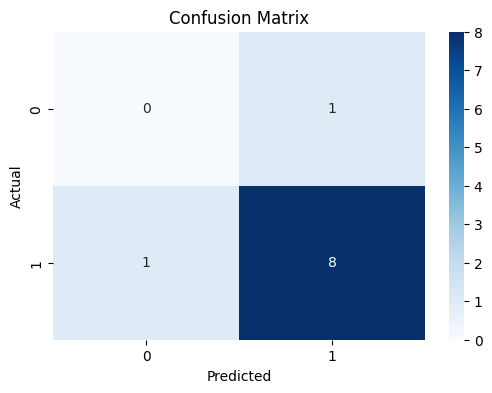

In [16]:
import seaborn as sns

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [17]:
# Contoh prediksi: Weekday, Yes Discount, Yes Free Delivery
# Format: [Day, Discount, Free Delivery]
# Encoding: Weekday=1, Holiday=0, Weekend=2; No=0, Yes=1

contoh_data = [[1, 1, 1]]  # Weekday, Yes, Yes
prediksi = model.predict(contoh_data)

if prediksi[0] == 1:
    print("Prediksi: Customer akan BUY! 🛒")
else:
    print("Prediksi: Customer TIDAK akan buy ❌")

Prediksi: Customer akan BUY! 🛒


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [18]:
import pandas as pd

data = pd.read_excel('shooping_demo.xls')
data.head()


,Day,Discount,Free Delivery,Buy
0,Weekday,Yes,Yes,Yes
1,Weekday,Yes,Yes,Yes
2,Weekend,No,No,No
3,Holiday,Yes,Yes,Yes
4,Weekday,Yes,Yes,Yes


In [19]:
data.shape

(50, 4)

In [20]:
data.columns

Index(['Day', 'Discount', 'Free Delivery', 'Buy'], dtype='object')

In [21]:
data['Buy'].value_counts()

,count
Buy,
Yes,41
No,9


In [22]:
PYes = 41/50
PNo = 9/50

In [23]:
data.columns
data.head()

,Day,Discount,Free Delivery,Buy
0,Weekday,Yes,Yes,Yes
1,Weekday,Yes,Yes,Yes
2,Weekend,No,No,No
3,Holiday,Yes,Yes,Yes
4,Weekday,Yes,Yes,Yes


In [24]:
PYes = len(data[data['Buy'] == 'Yes']) / len(data)
PNo = len(data[data['Buy'] == 'No']) / len(data)

print("P(Yes) =", PYes)
print("P(No)  =", PNo)

P(Yes) = 0.82
P(No)  = 0.18


In [25]:
pd.crosstab(data['Day'], data['Buy'])

Buy,No,Yes
Day,,
Holiday,6,18
Weekday,2,9
Weekend,1,14


In [26]:
PHolidayNo = 6/9
PWeekdayNo = 2/9
PWeekendNo = 1/9

PHolidayYes = 18/41
PWeekdayYes = 9/41
PWeekendYes = 14/41

PHoliday = 24/50
PWeekday = 11/50
PWeekend = 15/50

print(PWeekdayYes)

0.21951219512195122


In [27]:
# P(A|B)?
# P (B) = Pweekday
# P (A) = No Buy
# P(B|A) = P Weekday|NoBuy

In [28]:
PNoWeekday = (PWeekdayNo * PNo) / PWeekday
print("P(No | Weekday) =", PNoWeekday)

P(No | Weekday) = 0.1818181818181818


In [29]:
PYesWeekday = (PWeekdayYes * PYes) / PWeekday
print("P(Yes | Weekday) =", PYesWeekday)

P(Yes | Weekday) = 0.8181818181818181


In [30]:
# Probabilitas (Buy | Weekday) > dibandingkan dengan Probabilitas (NoBuy | weekday)
print(PNoWeekday)
print(PYesWeekday)

0.1818181818181818
0.8181818181818181


In [31]:
# Kondisi B di mana
# Day = Holiday
# Discount = Yes
# Free Delivery = Yes
# A = Buy
# P(A|B) = P(Buy|DiscountYes, Free Delivery Yes, PDayHoliday)

In [32]:
pd.crosstab(data['Discount'], data['Buy'])

Buy,No,Yes
Discount,,
No,5,12
Yes,4,29


In [33]:
# Probabilitas bersyarat Discount berdasarkan Buy
PNoDiscountNo = 5/9      # P(Discount = No  | Buy = No)
PYesDiscountNo = 4/9     # P(Discount = Yes | Buy = No)

PNoDiscountYes = 12/41   # P(Discount = No  | Buy = Yes)
PYesDiscountYes = 29/41  # P(Discount = Yes | Buy = Yes)

# Probabilitas total (marginal)
PNoDiscount = 17/50
PYesDiscount = 33/50

In [34]:
pd.crosstab(data['Free Delivery'], data['Buy'])

Buy,No,Yes
Free Delivery,,
No,4,10
Yes,5,31


In [35]:
# Probabilitas bersyarat Free Delivery berdasarkan Buy
PNoDeliveryNo = 4/9
PYesDeliveryNo = 5/9

PNoDeliveryYes = 10/41
PYesDeliveryYes = 31/41

# Probabilitas total
PNoDelivery = 14/50
PYesDelivery = 36/50

In [36]:
# Kondisi B dimana
# Day = "Holiday"
# Discount = "Yes"
# FreeDelivery = "Yes"

# Probabilitas
# P(A) = NoBuy = PNo
# P(B|A) = PYesDiscount, PYesDelivery, PHoliday
# P(A|B1) = (PHoliday|No Buy) * PHolidayNo
# P(A|B2) = (PYesDiscount|No Buy) * PYesDiscountNo
# P(A|B3) = (PYesDelivery|No Buy) * PYesDeliveryNo
# P(B) = PHoliday
# P(B2) = PYesDiscount
# P(B3) = PYesDelivery

# Data
# dttanya kan P(A|B) ?
# Rumus
# P(A|B) = P(B|A)*P(A)/P(B)

In [37]:
PNoBuy1 = (PHolidayNo * PYesDiscountNo * PYesDeliveryNo * PNo) / (PHoliday * PYesDiscount * PYesDelivery)
print(PNoBuy1)

0.12989982125784594


In [38]:
# Kondisi B dimana
# Day = "Holiday"
# Discount = "Yes"
# FreeDelivery = "Yes"

# Probabilitas
# P(A) = Buy = PYes
# P(B|A) = PYesDiscount, PYesDelivery, PHoliday
# P(A|B1) = (PHoliday|Buy) * PHolidayYes
# P(A|B2) = (PYesDiscount|Buy) * PYesDiscountYes
# P(A|B3) = (PYesDelivery|Buy) * PYesDeliveryYes
# P(B) = PHoliday
# P(B2) = PYesDiscount
# P(B3) = PYesDelivery

# Data
# dttanya kan P(A|B) ?
# Rumus
# P(A|B) = P(B|A)*P(A)/P(B)

In [39]:
PBuy2 = (PHolidayYes * PYesDiscountYes * PYesDeliveryYes * PYes) / (PHoliday * PYesDiscount * PYesDelivery)
print(PBuy2)

0.8440667832398943


In [40]:
# Probability of No Buy = 0.12989982125784594
# Probability of Buy = 0.8440667832398943

In [41]:
PSum = PNoBuy1 + PBuy2
print("Total probabilitas (PSum) =", PSum)

Total probabilitas (PSum) = 0.9739666044977402


In [42]:
PBuy = (PBuy2 / PSum) * 100
print("Persentase Buy    =", PBuy, "%")

Persentase Buy    = 86.66280541263185 %


In [43]:
PNoBuy = (PNoBuy1 / PSum) * 100
print("Persentase No Buy =", PNoBuy, "%")

Persentase No Buy = 13.337194587368147 %


In [44]:
PBuy_a = (PWeekdayYes * PYesDeliveryYes * PYesDiscountYes * PYes) / (PWeekday * PYesDelivery * PYesDiscount)
print("a. P(Buy | Weekday, Free Delivery=Yes, Discount=Yes) =", PBuy_a)

a. P(Buy | Weekday, Free Delivery=Yes, Discount=Yes) = 0.9208001271707938


In [45]:
PBuy_b = (PWeekdayYes * PNoDeliveryYes * PNoDiscountYes * PYes) / (PWeekday * PNoDelivery * PNoDiscount)
print("b. P(Buy | Weekday, Free Delivery=No, Discount=No) =", PBuy_b)

b. P(Buy | Weekday, Free Delivery=No, Discount=No) = 0.6135167278744279


In [46]:
PNoBuy_c = (PWeekdayNo * PYesDeliveryNo * PYesDiscountNo * PNo) / (PWeekday * PYesDelivery * PYesDiscount)
print("c. P(Not Buy | Weekday, Free Delivery=Yes, Discount=Yes) =", PNoBuy_c)

c. P(Not Buy | Weekday, Free Delivery=Yes, Discount=Yes) = 0.0944725972784334


In [47]:
PNoBuy_d = (PWeekdayNo * PNoDeliveryNo * PNoDiscountNo * PNo) / (PWeekday * PNoDelivery * PNoDiscount)
print("d. P(Not Buy | Weekday, Free Delivery=No, Discount=No) =", PNoBuy_d)

d. P(Not Buy | Weekday, Free Delivery=No, Discount=No) = 0.4715690990200793


In [48]:
PBuy_e = (PWeekendYes * PYesDeliveryYes * PYesDiscountYes * PYes) / (PWeekend * PYesDelivery * PYesDiscount)
print("e. P(Buy | Weekend, Free Delivery=Yes, Discount=Yes) =", PBuy_e)

e. P(Buy | Weekend, Free Delivery=Yes, Discount=Yes) = 1.0503942191429798


In [49]:
PBuy_f = (PWeekendYes * PNoDeliveryYes * PNoDiscountYes * PYes) / (PWeekend * PNoDelivery * PNoDiscount)
print("f. P(Buy | Weekend, Free Delivery=No, Discount=No) =", PBuy_f)

f. P(Buy | Weekend, Free Delivery=No, Discount=No) = 0.6998635266123104


In [50]:
PNoBuy_g = (PWeekendNo * PYesDeliveryNo * PYesDiscountNo * PNo) / (PWeekend * PYesDelivery * PYesDiscount)
print("g. P(Not Buy | Weekend, Free Delivery=Yes, Discount=Yes) =", PNoBuy_g)

g. P(Not Buy | Weekend, Free Delivery=Yes, Discount=Yes) = 0.034639952335425585


In [51]:
PNoBuy_h = (PWeekendNo * PNoDeliveryNo * PNoDiscountNo * PNo) / (PWeekend * PNoDelivery * PNoDiscount)
print("h. P(Not Buy | Weekend, Free Delivery=No, Discount=No) =", PNoBuy_h)

h. P(Not Buy | Weekend, Free Delivery=No, Discount=No) = 0.17290866964069576
